 Моделированием показать, что $$ \forall x : \forall \varepsilon: P \left( \left| F \left( x \right) - \bar{F}_n \right| > \varepsilon \right) \to 0 , n \to \infty$$

По неравенству Чебышева:
$$P \left( \left| X - E X \right| \geq \varepsilon \right) \leq \frac{D X}{\varepsilon^2}$$
Будем считать дисперсию выборочной функции распределения и смотреть на ее стремление к 0

Буду проверять на примере стандартного нормального распределения. Зафиксирую $x$.Для каждого значения $n$(размер выборки) буду генерировать $N$ выборок, буду строить по ним набор $N$ выборочных функций распределения, считать дисперсию, строить график.

In [1]:
import scipy.stats
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
# по заданной выборке sample возвращает значение выборочной функции распределения в точке(наборе точек) x
def sample_distribution_function(x,sample):
    if type(x) in [int,float]:
        x = [x]
    a,b =  len(x), len(sample)
    func = np.zeros(a)
    for i in range(a):
        for j in range(b):
            if x[i] > sample[j]:
                func[i] += 1
    return func/b


In [3]:
# эта функция возвращает дисперсию выборочной функции из выборки, имеющей нормальное распределение
def dispersion(n, mean, std, N = int(1e3), x = 0):
    sdfs = np.zeros(N)
    for i in range(N):                                         # генерирует N значений выборочной функции в точке 0
        sample = np.random.normal(mean,std,n)                  # выборка из n значений из нормального распределения
        sdfs[i] = sample_distribution_function(x,sample)[0]    # выборочная функция распределения в точке 0
    return np.std(sdfs) ** 2


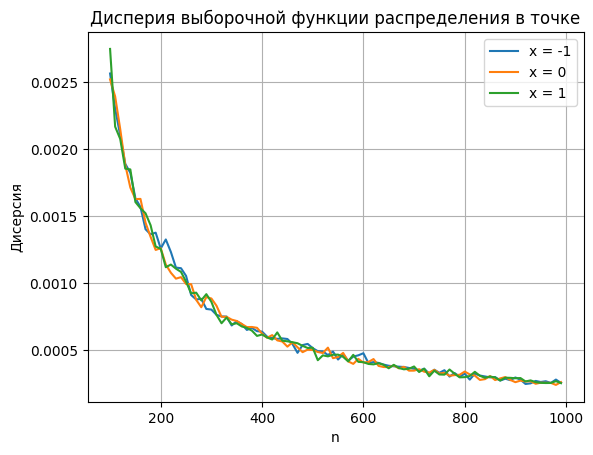

In [4]:
n = 1e3
ns = [int(i) for i in np.arange(100,n,10)] # набор значений n, для которых строятся графики
xs = [-1,0,1]                              # набор точек x, для которых строятся графики
for x in xs:
    dispersions = []
    for i in ns:
        dispersions.append(dispersion(i,0,1))
    plt.plot(ns,dispersions, label = 'x = {}'.format(x))
plt.xlabel('n')
plt.ylabel('Дисерсия')
plt.title('Дисперия выборочной функции распределения в точке')
plt.grid()
plt.legend()
plt.show()

